<b>This notebook contains the comparison of three NN models + the exact method. </b>

Each model had the same architecture and training parameters applied. However, the applied datasets differs for each model training. 

The datasets are described as follows (name, characteristic, samples (training/validation/test)):

* <b>All_ceramic</b> - images with averaged noise extracted from raw ceramic images combined with all other noises; 6000/1000/3000
* <b>Avg_ceramic</b> - images with averaged noise extracted from raw ceramic images; 6000/1000/3000
* <b>All_steel</b> - images with averaged noise extracted from raw steel images combined with all other noises; 6000/1000/3000
* <b>Avg_steel</b> - images with averaged noise extracted from raw steel images; 6000/1000/3000
* <b>Pure</b> - pure images generated according to the invented formula; 6000/1000/3000
* <b>Bubble</b> - pure images + randomly applied bubbles; 6000/1000/3000
* <b>Blackbox</b> - pure images + randomly applied blackbox that covered part of the image; 6000/1000/3000
* <b>Triangle</b> - pure images + randomly applied triangles of different brightness; 6000/1000/3000

***

The description of each NN model is provided as follows:

* <b>The Ceramic Model</b> - our best model obtained for the ceramic meterial in the first experimental phase. This model was trained using datasets:
    - All_ceramic
    - Avg_ceramic
    - Pure
    - Bubble
    - Blackbox
    - Triangle
    
    In total 36,000 images for the training.

* <b>The Steel Model</b> - our best model obtained for the steel material in the second experimental phase. This model was trained using datasets:
    - All_steel
    - Avg_steel
    - Pure
    - Bubble
    - Blackbox
    - Triangle
    
    In total 36,000 images for the training.

* <b>The General Model</b> - the ceramic model fine-tuned using steel datasets. Apart from 36,000 training images this model was fine-tuned using:
    - All_steel
    - Avg_steel
    
    In total it might be assumed that 48,000 images for the training were used.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

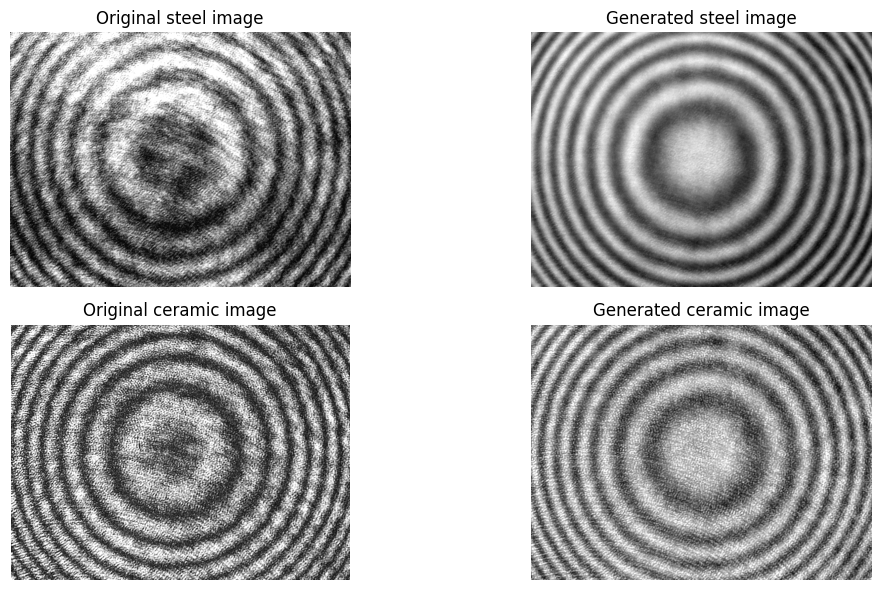

In [4]:
image_paths = [
    "../data/samples/steel_raw_00000.png",
    "../data/samples/average_00021.png",
    "../data/samples/ceramic_raw_00000.png",
    "../data/samples/average_ceramic_00021.png",
]

titles = [
    "Original steel image",
    "Generated steel image",
    "Original ceramic image",
    "Generated ceramic image",
]

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.ravel()
for i, (path, title) in enumerate(zip(image_paths, titles)):
    img = mpimg.imread(path)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## Analysis ##

In [5]:
# load ceramic model results
path = "../data/results/ceramic/"
ceramic_all_noise_df = pd.read_csv(f"{path}all_model-all_noise_results.csv")
ceramic_average_noise_df = pd.read_csv(f"{path}all_model-average_noise_results.csv")
ceramic_all_steel_df = pd.read_csv(f"{path}all_model-all_steel_results.csv")
ceramic_average_steel_df = pd.read_csv(f"{path}all_model-average_steel_results.csv")
ceramic_blackbox_noise_df = pd.read_csv(f"{path}all_model-blackbox_noise_results.csv")
ceramic_bubble_noise_df = pd.read_csv(f"{path}all_model-bubble_noise_results.csv")
ceramic_pizza_noise_df = pd.read_csv(f"{path}all_model-pizza_noise_results.csv")
ceramic_pure_noise_df = pd.read_csv(f"{path}all_model-pure_noise_results.csv")

ceramics = {
    "all_ceramic": ceramic_all_noise_df,
    "average_ceramic": ceramic_average_noise_df,
    "all_steel": ceramic_all_steel_df,
    "average_steel": ceramic_average_steel_df,
    "blackbox_noise": ceramic_blackbox_noise_df,
    "bubble_noise": ceramic_bubble_noise_df,
    "triangle_noise": ceramic_pizza_noise_df,
    "pure_noise": ceramic_pure_noise_df
}

In [10]:
# load steel model results
path = "../data/results/steel/"
steel_all_noise_df = pd.read_csv(f"{path}best_steel_model-all_results.csv")
steel_average_noise_df = pd.read_csv(f"{path}best_steel_model-average_results.csv")
steel_blackbox_noise_df = pd.read_csv(f"{path}best_steel_model-blackbox_results.csv")
steel_bubble_noise_df = pd.read_csv(f"{path}best_steel_model-bubble_results.csv")
steel_pizza_noise_df = pd.read_csv(f"{path}best_steel_model-pizza_results.csv")
steel_pure_noise_df = pd.read_csv(f"{path}best_steel_model-pure_results.csv")
steel_all_noise_ceramic = pd.read_csv(f"{path}best_steel_model-all_ceramic_results.csv")
steel_average_noise_ceramic = pd.read_csv(f"{path}best_steel_model-average_ceramic_results.csv")

steels = {
    "all_ceramic": steel_average_noise_ceramic,
    "average_ceramic": steel_average_noise_ceramic,
    "all_steel": steel_all_noise_df,
    "average_steel": steel_average_noise_df,
    "blackbox_noise": steel_blackbox_noise_df,
    "bubble_noise": steel_bubble_noise_df,
    "triangle_noise": steel_pizza_noise_df,
    "pure_noise": steel_pure_noise_df,
}

In [11]:
# load general model results
path = "../data/results/general/"
general_all_ceramic_df = pd.read_csv(f"{path}best_general_model-all_ceramic_results.csv")
general_average_ceramic_df = pd.read_csv(f"{path}best_general_model-average_ceramic_results.csv")
general_all_steel_df = pd.read_csv(f"{path}best_general_model-all_steel_results.csv")
general_average_steel_df = pd.read_csv(f"{path}best_general_model-average_steel_results.csv")
general_blackbox_noise_df = pd.read_csv(f"{path}best_general_model-blackbox_results.csv")
general_bubble_noise_df = pd.read_csv(f"{path}best_general_model-bubble_results.csv")
general_pizza_noise_df = pd.read_csv(f"{path}best_general_model-pizza_results.csv")
general_pure_noise_df = pd.read_csv(f"{path}best_general_model-pure_results.csv")

generals = {
    "all_ceramic": general_all_ceramic_df,
    "average_ceramic": general_average_ceramic_df,
    "all_steel": general_all_steel_df,
    "average_steel": general_average_steel_df,
    "blackbox_noise": general_blackbox_noise_df,
    "bubble_noise": general_bubble_noise_df,
    "triangle_noise": general_pizza_noise_df,
    "pure_noise": general_pure_noise_df
}

In [28]:
# Load results for the exact method
exact_path = "../data/results/exact_method/"
exact_all_noise_df = pd.read_csv(f"{exact_path}exact_method-all_noise_results.csv")
exact_average_noise_df = pd.read_csv(f"{exact_path}exact_method-average_noise_results.csv")
exact_blackbox_noise_df = pd.read_csv(f"{exact_path}exact_method-blackbox_noise_results.csv")
exact_bubble_noise_df = pd.read_csv(f"{exact_path}exact_method-bubble_noise_results.csv")
exact_pizza_noise_df = pd.read_csv(f"{exact_path}exact_method-pizza_noise_results.csv")
exact_pure_noise_df = pd.read_csv(f"{exact_path}exact_method-pure_noise_results.csv")
exact_all_steel_df = pd.read_csv(f"{exact_path}exact_method-all_steel_results.csv")
exact_average_steel_df = pd.read_csv(f"{exact_path}exact_method-avg_steel_results.csv")

exact_dfs = {
    "all_ceramic": exact_all_noise_df,
    "average_ceramic": exact_average_noise_df,
    "all_steel": exact_all_steel_df,
    "average_steel": exact_average_steel_df,
    "blackbox_noise": exact_blackbox_noise_df,
    "bubble_noise": exact_bubble_noise_df,
    "triangle_noise": exact_pizza_noise_df,
    "pure_noise": exact_pure_noise_df
}

In [15]:
def adjusted_plot_loss_distribution(df):
    # Calculate the adjusted loss based on the new logic
    def calculate_adjusted_loss(row):
        # Calculate the absolute difference
        absolute_difference = abs(row["predicted"] - row["epsilon"])
        # Considering the cyclic nature, find the minimum difference
        adjusted_loss = min(absolute_difference, 1 - absolute_difference)
        
        # Determine if it's an underestimation or overestimation
        if row["predicted"] < row["epsilon"]:
            if row["epsilon"] - row["predicted"] > 0.5:  # the values are on opposite sides of the cycle
                adjusted_loss = abs(adjusted_loss)  # it's an overestimation
            else:
                adjusted_loss = -abs(adjusted_loss)  # it's an underestimation
        else:
            if row["predicted"] - row["epsilon"] > 0.5:  # the values are on opposite sides of the cycle
                adjusted_loss = -abs(adjusted_loss)  # it's an underestimation
            else:
                adjusted_loss = abs(adjusted_loss)  # it's an overestimation

        return adjusted_loss
    df['adjusted_loss'] = df.apply(calculate_adjusted_loss, axis=1)

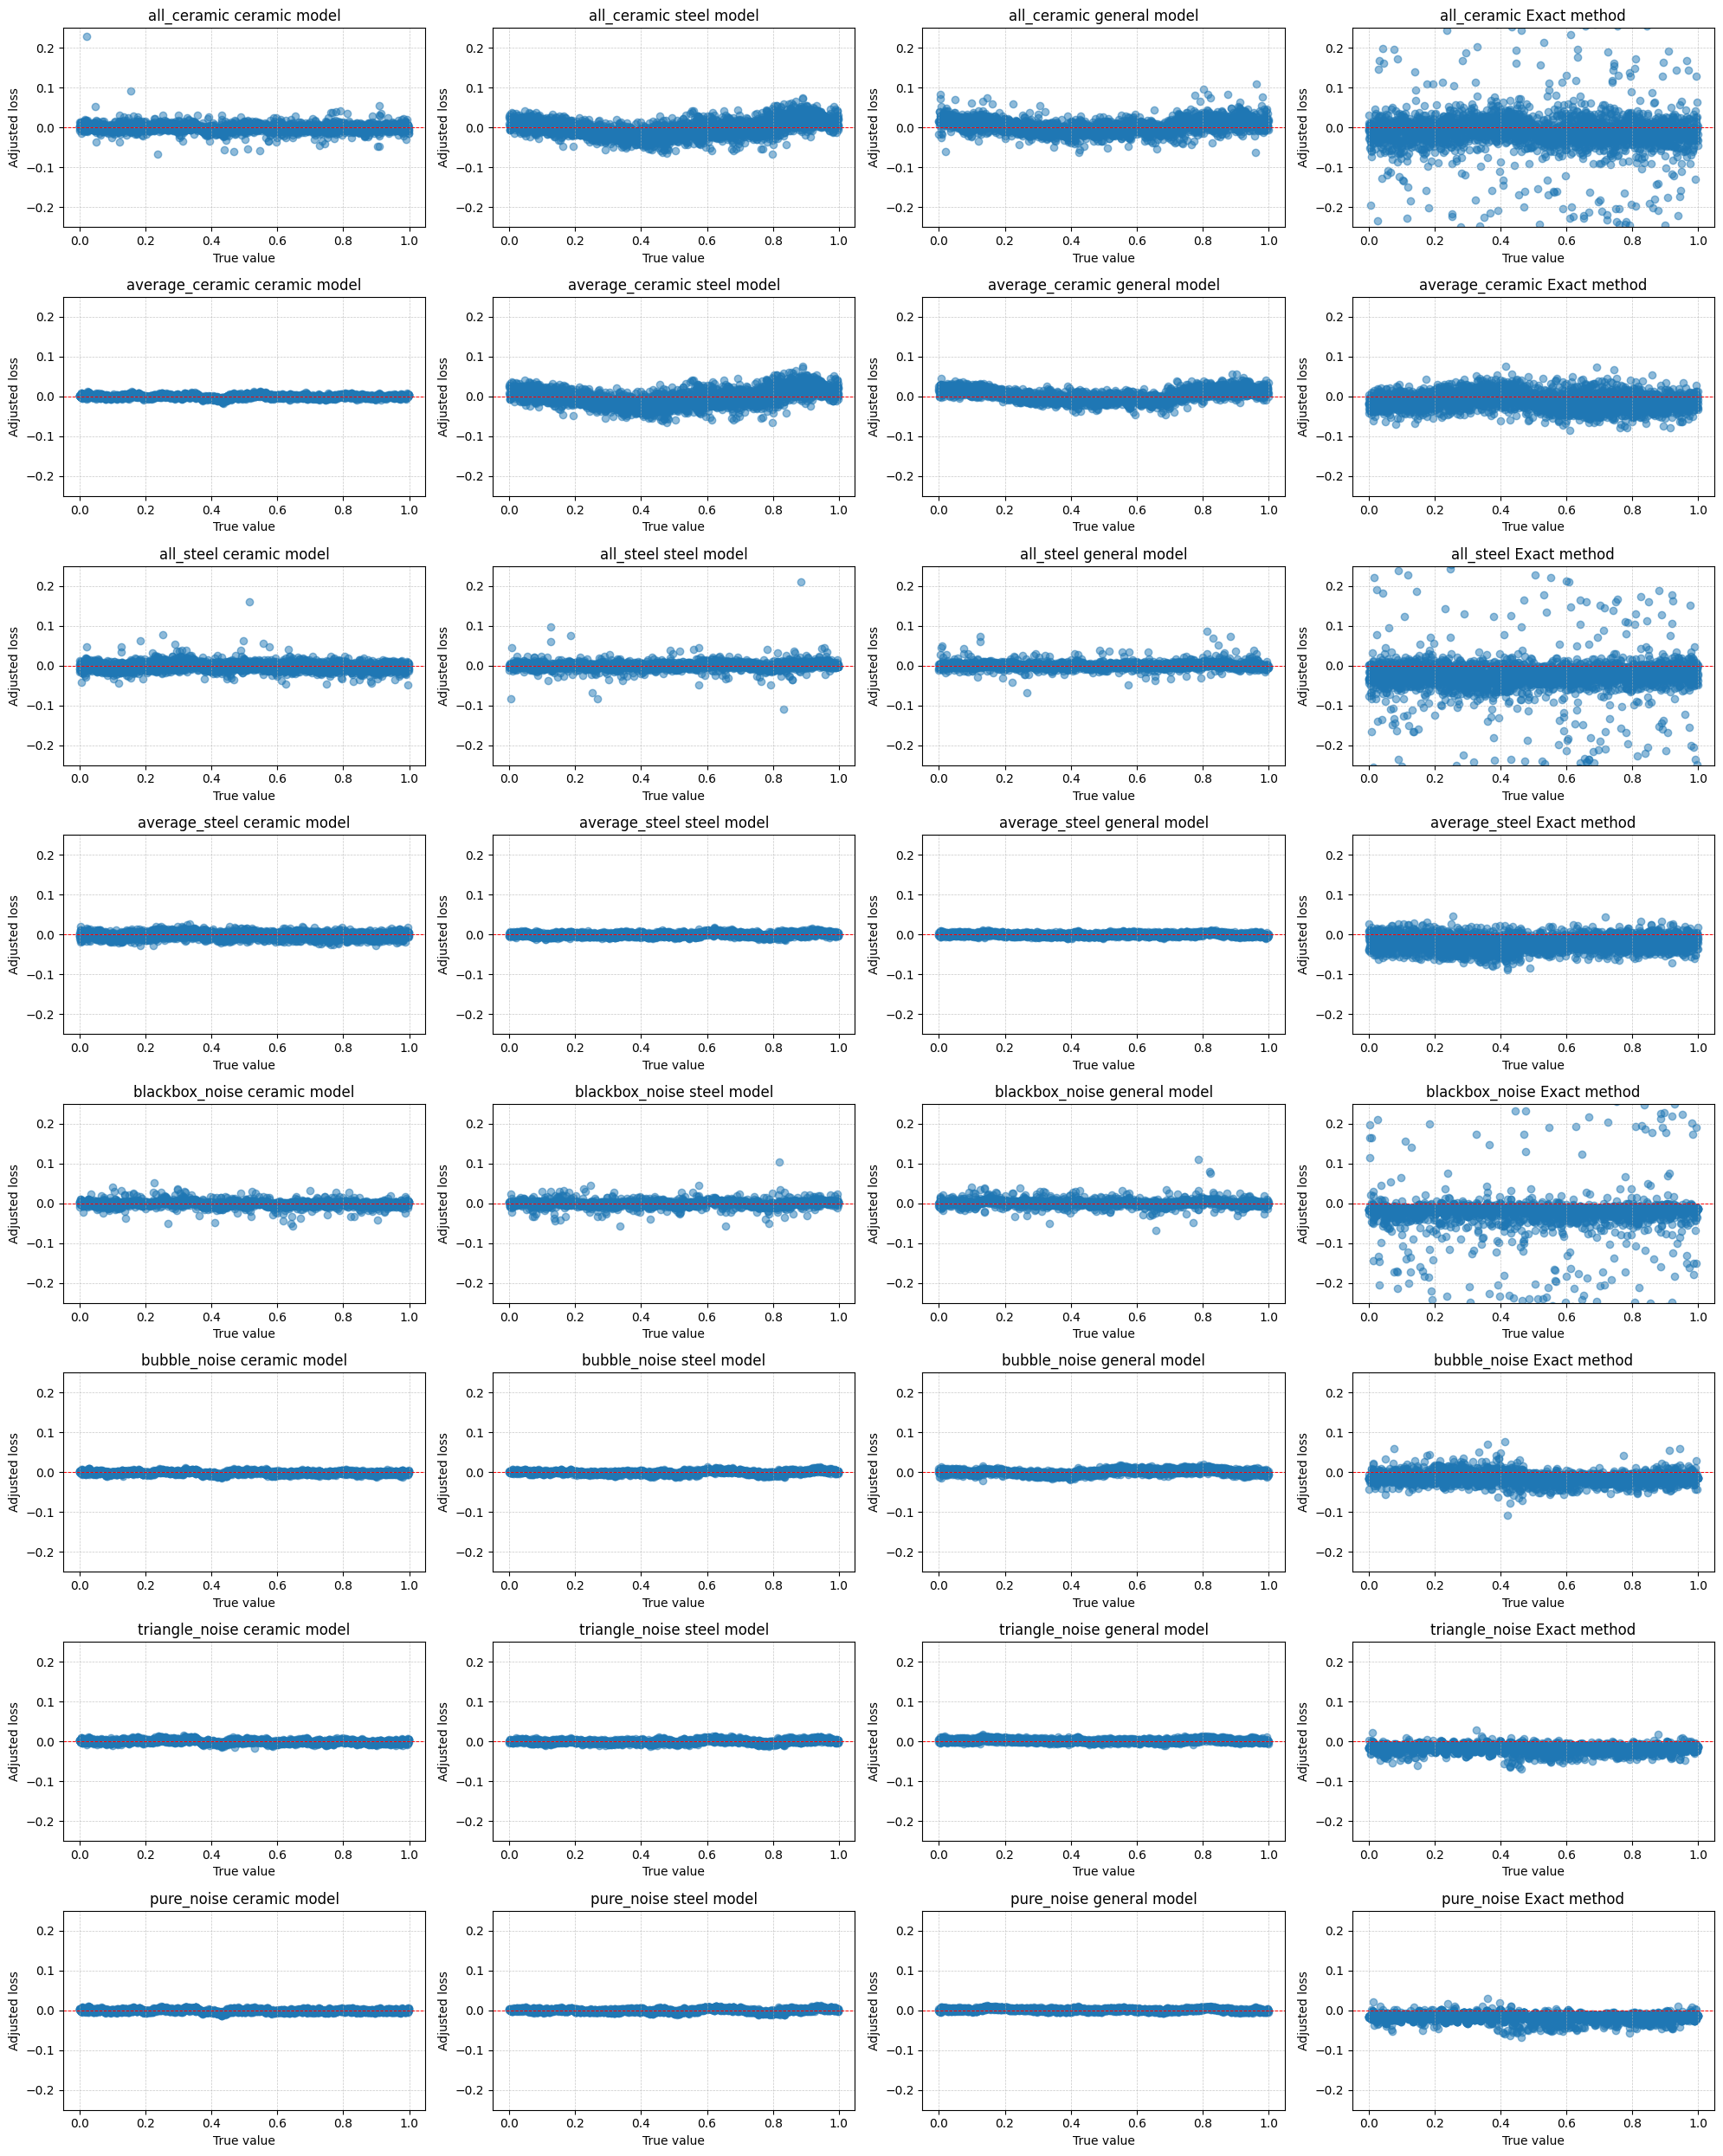

In [29]:
# in each row plot the loss distribution for the steel mode, ceramic model and general model for a given dataset
fig, axs = plt.subplots(8, 4, figsize=(20, 25))  # Adjust the figure size as needed

keys = list(ceramics.keys())
y_limit = 0.25
for i, key in enumerate(keys):
    cer_df = ceramics[key]
    steel_df = steels[key]
    general_df = generals[key]
    exact_df = exact_dfs[key]

    adjusted_plot_loss_distribution(cer_df)
    adjusted_plot_loss_distribution(steel_df)
    adjusted_plot_loss_distribution(general_df)
    adjusted_plot_loss_distribution(exact_df)

    axs[i, 0].scatter(cer_df["epsilon"], cer_df["adjusted_loss"], alpha=0.5)
    axs[i, 0].axhline(0, color='r', linestyle='--', linewidth=0.7)
    axs[i, 0].set_title(f"{key} ceramic model")
    axs[i, 0].set_xlabel("True value")
    axs[i, 0].set_ylabel("Adjusted loss")
    axs[i, 0].set_ylim(-y_limit, y_limit)
    axs[i, 0].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

    axs[i, 1].scatter(steel_df["epsilon"], steel_df["adjusted_loss"], alpha=0.5)
    axs[i, 1].axhline(0, color='r', linestyle='--', linewidth=0.7)
    axs[i, 1].set_title(f"{key} steel model")
    axs[i, 1].set_xlabel("True value")
    axs[i, 1].set_ylabel("Adjusted loss")
    axs[i, 1].set_ylim(-y_limit, y_limit)
    axs[i, 1].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

    axs[i, 2].scatter(general_df["epsilon"], general_df["adjusted_loss"], alpha=0.5)
    axs[i, 2].axhline(0, color='r', linestyle='--', linewidth=0.7)
    axs[i, 2].set_title(f"{key} general model")
    axs[i, 2].set_xlabel("True value")
    axs[i, 2].set_ylabel("Adjusted loss")
    axs[i, 2].set_ylim(-y_limit, y_limit)
    axs[i, 2].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

    axs[i, 3].scatter(exact_df["epsilon"], exact_df["adjusted_loss"], alpha=0.5)
    axs[i, 3].axhline(0, color='r', linestyle='--', linewidth=0.7)
    axs[i, 3].set_title(f"{key} Exact method")
    axs[i, 3].set_xlabel("True value")
    axs[i, 3].set_ylabel("Adjusted loss")
    axs[i, 3].set_ylim(-y_limit, y_limit)
    axs[i, 3].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    


plt.tight_layout()
plt.show()

In [30]:
# For each model compute the average "loss" and present results in one dataframe
def calculate_average_loss(df):
    return df["loss"].mean()

keys = list(ceramics.keys())
average_losses = []
for key in keys:
    cer_df = ceramics[key]
    steel_df = steels[key]
    general_df = generals[key]
    exact_df = exact_dfs[key]

    average_losses.append({
        "Steel model": calculate_average_loss(steel_df),
        "Ceramic model": calculate_average_loss(cer_df),
        "General model": calculate_average_loss(general_df),
        "Exact method": calculate_average_loss(exact_df)
    })

average_losses_df = pd.DataFrame(average_losses, index=keys)
average_losses_df

,Steel model,Ceramic model,General model,Exact method
all_ceramic,0.015998,0.005870,0.012847,0.057040
average_ceramic,0.015998,0.002946,0.011385,0.019024
all_steel,0.005120,0.007207,0.004159,0.055556
average_steel,0.003446,0.006045,0.002581,0.022731
blackbox_noise,0.004329,0.004058,0.004183,0.053319
bubble_noise,0.003150,0.002823,0.004552,0.016064
triangle_noise,0.003177,0.003161,0.003380,0.017748
pure_noise,0.003019,0.002655,0.002666,0.017791


For us, the most important rows should be "average ceramic" and "average steel" as their indicate images the most similar to the original raw ones.